## Übung Predictive Maintenance - Anwendungsfall Kugellager

### Einleitung

Eine Einführung in den behandelten Anwendungsfall und die verwendeten Daten wird im Kurselement "Anwendungsfall Kugellager" gegeben. Sie können gerne noch einmal zu diesem Kurselement zurückkehren bevor Sie mit der praktischen Übung beginnen.   

### Schritt 1: Herunterladen der Daten

#### Aufgabe 1.1
Als erstes muss der für die Übung verwendete Datensatz heruntergeladen werden.
Gehen Sie dazu auf das <a href="https://data.phmsociety.org/nasa/">Prognostics Data Repository</a> der PHM Society. Hier findet sich eine Sammlung von Datensätzen für Predictive Maintenance Anwendungen. Scrollen Sie nach unten bis zum Datensatz "4. Bearing" und klicken Sie auf den Link in der Zeile "Download". Speichern Sie die heruntergeladene zip-Datei mit dem Namen IMS in den Ordner DATA.

Hinweis: Der Download des Datensatzes kann ein paar Minuten dauern.

In [2]:
!wget -cq https://phm-datasets.s3.amazonaws.com/NASA/4.+Bearings.zip

In [5]:
!ls -l

total 1050400
-rw-r--r-- 1 root root 1075597174 Sep 18  2022 4.+Bearings.zip
drwxr-xr-x 3 root root       4096 Feb 15 13:57 bearings
drwxr-xr-x 1 root root       4096 Feb 13 14:23 sample_data


In [9]:
!unzip 4.+Bearings.zip -d .

Archive:  4.+Bearings.zip
   creating: ./4. Bearings/
  inflating: ./4. Bearings/IMS.7z    


In [14]:
!ls -l '4. Bearings'

total 1050124
-rw-r--r-- 1 root root 1075320408 Jul 14  2022 IMS.7z


In [16]:
!ls '4. Bearings'
!ls -l

IMS.7z
total 1050400
drwxr-xr-x 2 root root       4096 Sep 17  2022 '4. Bearings'
-rw-r--r-- 1 root root 1075597174 Sep 18  2022  4.+Bearings.zip
drwxr-xr-x 1 root root       4096 Feb 13 14:23  sample_data


In [17]:
!7z e '4. Bearings/IMS.7z'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1075320408 bytes (1026 MiB)

Extracting archive: 4. Bearings/IMS.7z
--
Path = 4. Bearings/IMS.7z
Type = 7z
Physical Size = 1075320408
Headers Size = 279
Method = LZMA:24
Solid = +
Blocks = 1

  0%      0% - 1st_test.rar                     1% - 1st_test.rar                     2% - 1st_test.rar                     3% - 1st_test.rar                     4% - 1st_test.rar                     5% - 1st_test.rar                     6% - 1st_test.rar                   

In [34]:
!ls -l

total 84012
drwxr-xr-x 2 root root    36864 Oct 19  2006  2nd_test
-rw-r--r-- 1 root root 85581092 Sep 18  2007  2nd_test.rar
-rw-r--r-- 1 root root   400443 Oct 10  2012 'Readme Document for IMS Bearing Data.pdf'
drwxr-xr-x 1 root root     4096 Feb 13 14:23  sample_data


In [26]:
!rm 1st_test.rar
!rm 3rd_test.rar
!rm -r 4.+Bearings.zip
!rm -r '4. Bearings'

rm: cannot remove '1st_test.rar': No such file or directory
rm: cannot remove '3rd_test.rar': No such file or directory
rm: cannot remove '4.+Bearings.zip': No such file or directory


In [31]:
!pip install unrar
!unrar x 2nd_test.rar
!ls -l


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from 2nd_test.rar

Creating    2nd_test                                                  OK
Extracting  2nd_test/2004.02.12.10.32.39                                   0%  OK 
Extracting  2nd_test/2004.02.12.10.42.39                                   0%  OK 
Extracting  2nd_test/2004.02.12.10.52.39                                   0%  OK 
Extracting  2nd_test/2004.02.12.11.02.39                                   0%  OK 
Extracting  2nd_test/2004.02.12.11.12.39                                   0%  OK 
Extracting  2nd_test/2004.02.12.11.22.39                                   0%  OK 
Extracting  2nd_test/2004.02.12.11.32.39                                   0%  OK 
Extracting  2nd_test/2004.02.12.11.42.39                                   0%  OK 
Extracting  2nd_test/2004.02.12.11.52.39                                   0%

### Schritt 2: Entpacken der Daten

#### Aufgabe 2.1
Öffnen Sie die heruntergeladene zip-Datei mit dem Namen "4.+Bearings" (z.B. mit 7-Zip) und klicken Sie dann auf den Ordner "4. Bearings". Sie sollten dann die Datei "IMS.7z" sehen. Öffnen Sie diese zip-Datei. Sie sollten dann eine Readme-Datei sowie drei zip-Dateien mit den Namen "1st_test", "2nd_test" und "3rd_test" sehen. Für die Übung wird nur der kleinste Datensatz "2nd_test" verwendet. Entpacken Sie dazu die zip-Datei "2nd_test" in einen Ordner Ihrer Wahl.

### Schritt 3: Exploration der Daten

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from scipy import signal

from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow import keras

In [36]:
# Relevante Metadaten
ncol = 4
fs = 20480 # Abtastrate der Sensoren in Hz

#### Aufgabe 3.1

Der Datensatz besteht aus 984 Dateien, wobei jede dieser Dateien die Messungen aller vier
Beschleunigungssensoren für eine Zeitdauer von einer Sekunde beinhaltet. Der Datensatz deckt die ganze Lebensdauer der Kugellager ab, d.h. am Anfang sind die Kugellager neu und es werden Messungen gemacht bis eines der vier Kugellager kaputt geht. Machen Sie sich mit dem Datensatz vertraut und beantworten Sie die folgenden Fragen, indem Sie den gegebenen Code ausführen. Wie viele Spalten und Zeilen beinhaltet eine Datei? Was bedeuten diese?

In [37]:
# Einlesen der Daten aus der ersten Datei

path = "2nd_test/" # Dateipfad
first_file = '2004.02.12.10.32.39' # Dateiname

df_first = pd.read_csv(path + first_file, sep='\t', header=None)


df_first.info() # Anzeigen von Informationen über die eingelesenen Daten
df_first.head(5) # Anzeigen der ersten 5 Zeilen des Datensatzes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20480 entries, 0 to 20479
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20480 non-null  float64
 1   1       20480 non-null  float64
 2   2       20480 non-null  float64
 3   3       20480 non-null  float64
dtypes: float64(4)
memory usage: 640.1 KB


,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054


#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie die Lösung der Aufgabe laden.

In [38]:
%run Loesung/Loesung_3_1.py

Exception: File `'Loesung/Loesung_3_1.py'` not found.

#### Aufgabe 3.2
Was bedeutet der Dateiname?

In [39]:
print('Dateiname 1.Datei:', first_file)
d = pd.to_datetime(first_file, format='%Y.%m.%d.%H.%M.%S')
print('Dateiname 1.Datei formatiert:', d)

Dateiname 1.Datei: 2004.02.12.10.32.39
Dateiname 1.Datei formatiert: 2004-02-12 10:32:39


#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie die Lösung der Aufgabe laden.

In [ ]:
%run Loesung/Loesung_3_2.py

#### Aufgabe 3.3
In welchem Zeitraum wurden die Daten aufgenommen? In welchem zeitlichen Abstand wurden die Daten aufgenommen? Was könnte der Grund dafür sein?

In [ ]:
date = []
for dirpath, dirnames, files in os.walk(path):
    for file_name in files:
        date = np.append(date, file_name)

date = pd.to_datetime(date, format='%Y.%m.%d.%H.%M.%S')
print(date)
date = date.to_numpy()

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie die Lösung der Aufgabe laden.

In [ ]:
%run Loesung/Loesung_3_3.py

#### Aufgabe 3.4
Betrachten Sie eine der ersten Messungen und eine der letzten Messungen kurz bevor eines der Kugellager kaputt geht. Dargestellt sind zum einen die von den vier Beschleunigungssensoren gemessenen Signale (Zeile 1), sowie <a href=https://de.wikipedia.org/wiki/Spektrogramm>Spektrogramme</a> der gemessenen Signale von Sensor 1 (Zeile 2) und Sensor 2 (Zeile 3). Was fällt Ihnen auf? Welches der Kugellager bricht?

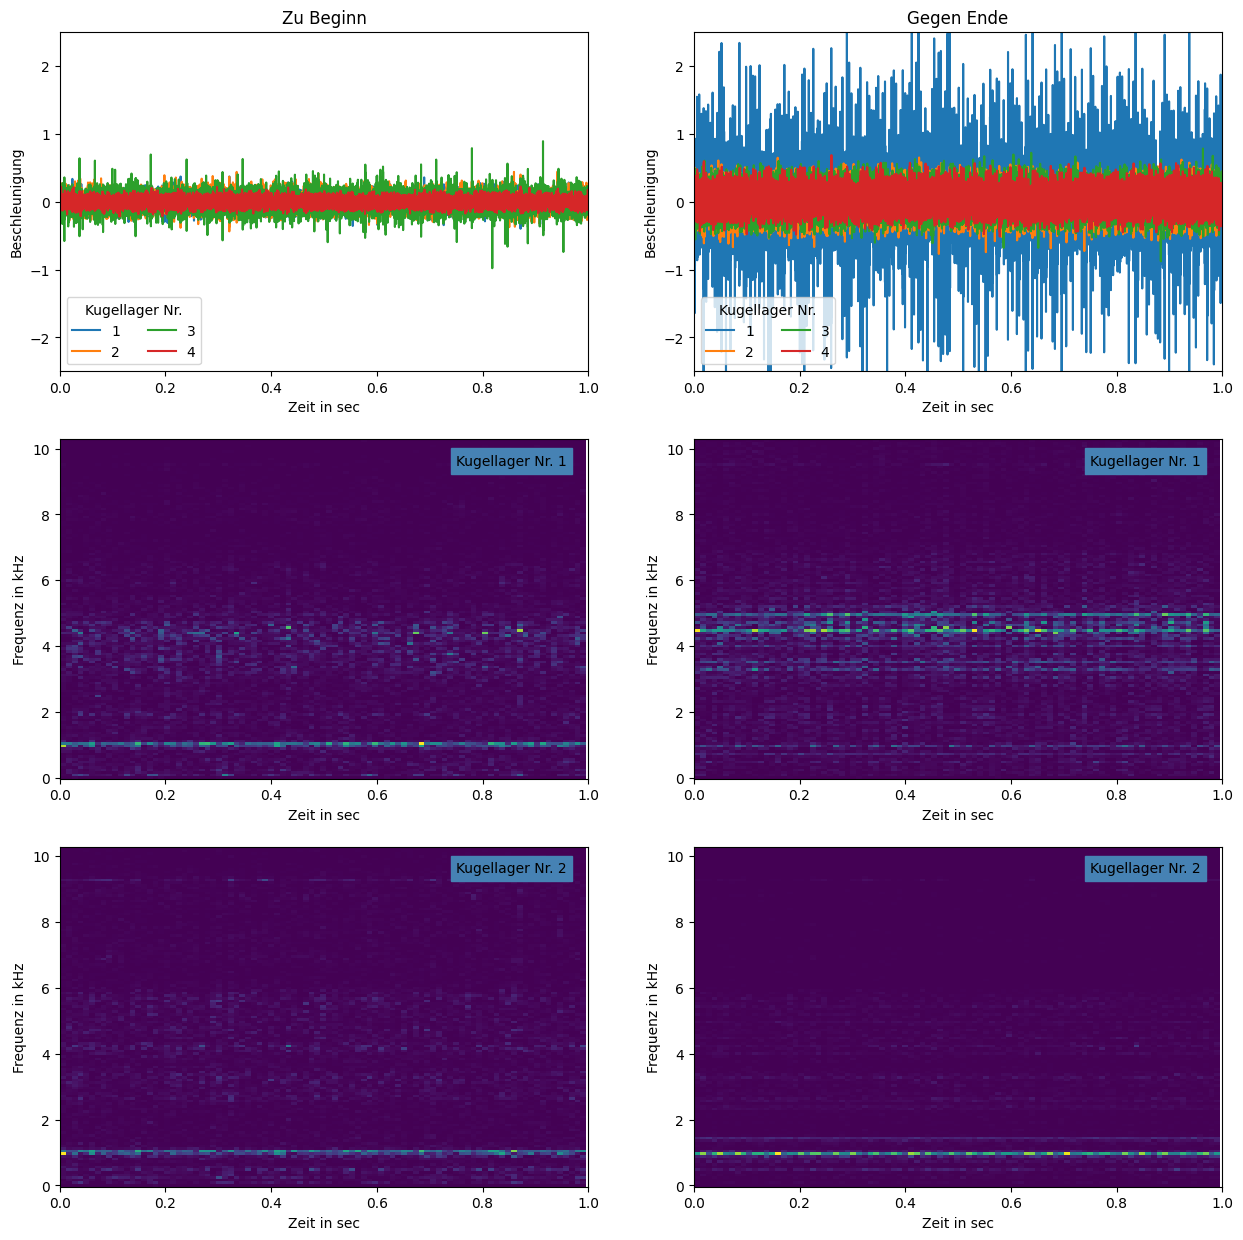

In [42]:
def make_acceleration_subplot(val,title,pos):
    ax = fig.add_subplot(3, 2, pos)
    for i in range(ncol):
        plt.plot(time, val[:,i], label=str(i+1))
    plt.legend(title='Kugellager Nr.', ncol=2, loc='lower left')
    plt.xlabel('Zeit in sec')
    plt.ylabel('Beschleunigung')
    plt.ylim(-2.5,2.5)
    plt.xlim(0,1)
    plt.title(title)

def make_spectrogram_subplot(val,text,pos):
    ax = fig.add_subplot(3, 2, pos)
    f, t, Sxx = signal.spectrogram(val, fs)
    plt.pcolormesh(t, f, Sxx, shading='auto')
    plt.yticks(ticks=[0,2000,4000,6000,8000,10000],labels=['0','2','4','6','8','10'])
    plt.ylabel('Frequenz in kHz')
    plt.xlabel('Zeit in sec')
    plt.xlim(0,1)
    plt.text(0.75,9500,text, color='black', backgroundcolor='steelblue')

good_file = '2004.02.12.15.02.39'
bad_file = '2004.02.19.04.22.39'

df_good = pd.read_csv(path + good_file, sep='\t', header=None)
df_bad = pd.read_csv(path + bad_file, sep='\t', header=None)

values_good = df_good.values
values_bad = df_bad.values

fig = plt.figure(figsize=(15,15))
time = np.arange(fs)/fs

make_acceleration_subplot(values_good,'Zu Beginn',1)
make_acceleration_subplot(values_bad, 'Gegen Ende',2)

make_spectrogram_subplot(values_good[:,0],'Kugellager Nr. 1',3)
make_spectrogram_subplot(values_good[:,1],'Kugellager Nr. 2',5)
make_spectrogram_subplot(values_bad[:,0],'Kugellager Nr. 1',4)
make_spectrogram_subplot(values_bad[:,1],'Kugellager Nr. 2',6)

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie die Lösung der Aufgabe laden.

In [ ]:
%run Loesung/Loesung_3_4.py

Gegen Ende messen alle Sensoren eine stärkere Vibration als zu Beginn. Insbesondere für Kugellager Nr. 1 werden gegen Ende um ein vielfaches höhere Beschleunigungen gemessen, als zu Beginn und im Frequenzspektrum sind verstärkt höhere Frequenzen präsent. Die Messreihe endet mit dem Bruch von Kugellager Nr. 1.


### Schritt 4: Datenvorverarbeitung

#### Aufgabe 4.1
Welche statistischen Eigenschaften (z.B. Standardabweichung) und welche spektralen Eigenschaften (Frequenzen) könnten für die Erkennung von auftretenden Annomalien relevant sein? Überlegen Sie sich eine Reihe von Merkmalen und bestimmen Sie diese für jede Datei. Orientieren Sie sich am gegebenen Beispiel.      

Für die Implementierung sind u.U. die <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html">Pandas API reference</a> und die <a href='https://numpy.org/doc/stable/reference/routines.statistics.html'>numpy API reference</a> hilfreich.

In [ ]:
# Definition der Merkmale

def extract_features(file_name):
    df = pd.read_csv(path + file_name, sep='\t', header=None)
    values = df.values

    features = np.array([])

    # Standardabweichung (für jeden der vier Sensoren) -> 4 Merkmale
    std = df.std().values
    features = np.append(features, std)

    # Durchschnittlicher Frequenzanteil >2kHz (für jeden der vier Sensoren) -> 4 Merkmale
    for i in range(0,4):
        f, t, Sxx = signal.spectrogram(values[:,i], fs)
        idx = np.where(f>2000)[0]
        sum_loc = np.sum(Sxx[:,idx[0]:],axis=0)
        features = np.append(features, np.mean(sum_loc))

    # Weiteres Merkmal (für jeden der vier Sensoren) hinzufügen

    # Weiteres Merkmal (für jeden der vier Sensoren) hinzufügen

    # Weiteres Merkmal (für jeden der vier Sensoren) hinzufügen

    # Weiteres Merkmal (für jeden der vier Sensoren) hinzufügen

    return features

# Extraktion der Merkmale für alle Dateien

n_files = 984
n_features = 8 # Hier die korrekte Zahl der Merkmale eintragen!!!

date = []
X = []

for dirpath, dirnames, files in os.walk(path):
    for file_name in files:
        features = extract_features(file_name)
        date = np.append(date, file_name)
        X = np.append(X, features)

X = X.reshape(n_files,n_features)
date = pd.to_datetime(date, format='%Y.%m.%d.%H.%M.%S')
date = date.to_numpy()

print('Zeitpunkt Datei 1:', date[1])
print('Merkmale Datei 1:', X[0])

Zeitpunkt Datei 1: 2004-02-12T10:42:39.000000000
Merkmale Datei 1: [7.34767249e-02 9.00556733e-02 1.08436157e-01 5.31676883e-02
 6.47417377e-05 9.89005290e-05 1.44746505e-04 3.47784817e-05]


#### Tipp
Sie können einen Tipp zur Lösung der Aufgabe erhalten, indem Sie die nächste Zeile ausführen.

In [ ]:
%run Tipps/Tipp_4_1.py

Weitere statistische Eigenschaften die betrachtet werden können sind z.B. Mittelwert, Maximalwert oder quadratisches Mittel. Als weitere spektrale Eigenschaft kann z.B. die durchschnittliche Frequenz mit größter Amplitude betrachtet werden.


#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie eine mögliche Lösung der Aufgabe laden.    

In [40]:
# %load Loesung/Loesung_4_1.py
# Definition der Merkmale

def extract_features(file_name):
    df = pd.read_csv(path + file_name, sep='\t', header=None)
    values = df.values

    features = np.array([])

    # Standardabweichung (für jeden der vier Sensoren) -> 4 Merkmale
    std = df.std().values
    features = np.append(features, std)

    # Durchschnittlicher Frequenzanteil >2kHz (für jeden der vier Sensoren) -> 4 Merkmale
    for i in range(0,4):
        f, t, Sxx = signal.spectrogram(values[:,i], fs)
        idx = np.where(f>2000)[0]
        sum_loc = np.sum(Sxx[:,idx[0]:],axis=0)
        features = np.append(features, np.mean(sum_loc))

    # Maximalwert (für jeden der vier Sensoren) -> 4 Merkmale
    maxi = df.abs().max().values
    features = np.append(features, maxi)

    # Quadratisches Mittel (für jeden der vier Sensoren) -> 4 Merkmale
    rms = np.sqrt(np.mean(np.power(values,2),0))
    features = np.append(features, rms)

    # Scheitelfaktor (für jeden der vier Sensoren) -> 4 Merkmale
    crest = maxi/rms
    features = np.append(features, crest)

    # Durchschnittliche Frequenz mit größter Amplitude (für jeden der vier Sensoren) -> 4 Merkmale
    for i in range(0,4):
        f, t, Sxx = signal.spectrogram(values[:,i], fs)
        max_loc = np.argmax(Sxx,0)
        features = np.append(features, np.mean(f[max_loc]))

    return features

# Extraktion der Merkmale für alle Dateien

n_files = 984
n_features = 24 # Hier die Zahl der Merkmale eintragen!

T = np.array([])
X = np.array([])

for dirpath, dirnames, files in os.walk(path):
    for file_name in files:
        features = extract_features(file_name)
        T = np.append(T, file_name.split('.'))
        X = np.append(X, features)

X = X.reshape(n_files,n_features)
T = np.array(T,dtype=float)
T = T.reshape(n_files,-1)

print('Merkmale Datei 1:', X[0])

Merkmale Datei 1: [1.28507174e-01 9.64994023e-02 1.00398499e-01 6.21741460e-02
 2.02803078e-04 1.15055619e-04 1.27042016e-04 4.82555927e-05
 6.86000000e-01 4.42000000e-01 8.08000000e-01 2.66000000e-01
 1.28517232e-01 9.65112280e-02 1.00414190e-01 6.22455735e-02
 5.33780560e+00 4.57977801e+00 8.04667152e+00 4.27339624e+00
 4.22153846e+03 1.02857143e+03 2.99164835e+03 2.70945055e+03]


#### Aufgabe 4.2
Betrachten Sie die aus den Dateien extrahierten Merkmale. Ab welchem Zeitpunkt sind Auffälligkeit erkennbar?   

NameError: name 'date' is not defined

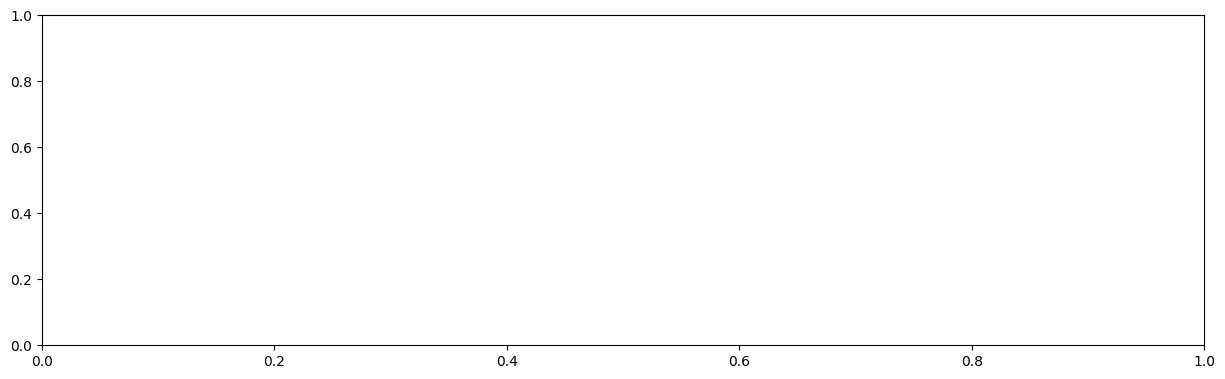

In [41]:
n_plot = int(n_features/4)
fig = plt.figure(figsize=(15,n_plot*5))

for i in range(n_plot):

    ax = fig.add_subplot(n_plot, 1, i+1)
    plt.plot(date, X[:,i*4+0], label='1')
    plt.plot(date, X[:,i*4+1], label='2')
    plt.plot(date, X[:,i*4+2], label='3')
    plt.plot(date, X[:,i*4+3], label='4')
    plt.legend(title='Kugellager Nr.')
    plt.ylabel('Merkmal ' + str(i+1))

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie die Lösung der Aufgabe laden.

In [ ]:
%run Loesung/Loesung_4_2.py

### Schritt 5: Sampling

#### Aufgabe 5.1
Zunächst muss der vorhandene Datensatz in Trainingsdaten und Testdaten aufgeteilt werden. Zum Trainieren der Annomalieerkennung werden nur Daten von den ersten beiden Tagen (12. und 13. Februar 2004) verwendet. Es kann aufgrund der obigen Betrachtung davon ausgegangen werden, dass in dieser Zeitspanne alle Kugellager in Ordnung sind und die Daten dem Normalfall entsprechen. Der Rest der Daten wird als Testdaten für die Annomalieerkennung verwendet. Ergänzen Sie den gegebenen Code.

In [ ]:
# Aufteilung der Daten in Trainings- und Testdatensatz

train_idx = np.where(date<np.datetime64('2004-02-14'))[0] # Nummern der Dateien, die zum Trainingsdatensatz gehören
# test_idx =

X_train = X[train_idx] # Trainingsdaten
# X_test =

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie die Lösung der Aufgabe laden.

In [ ]:
# %load Loesung/Loesung_5_1.py
# Aufteilung der Daten in Trainings- und Testdatensatz

train_idx = np.where(date<np.datetime64('2004-02-14'))[0] # Nummern der Dateien, die zum Trainingsdatensatz gehören
test_idx = np.where(date>=np.datetime64('2004-02-14'))[0]

X_train = X[train_idx] # Trainingsdaten
X_test = X[test_idx]

### Schritt 6: Umsetzung Anomalieerkennung mit dem K-nächste-Nachbarn Algorithmus

#### Aufgabe 6.1:
Der K-nächste-Nachbarn Algorithmus wird üblicherweise für Klassifikationsprobleme eingesetzt. Er sucht die K Datenpunkte aus dem Trainingsdatensatz, die einem neuen Test-Datenpunkt am nächsten sind, welche als K-nächste Nachbarn bezeichnet werden. Anhand der Klassen dieser K Datenpunkte wird dann eine Vorhersage für die Klasse des neuen Test-Datenpunkts gemacht. Bei der Anomalieerkennung enthält der Trainingsdatensatz nur eine Klasse "in Ordnung". Was wird in diesem Fall für die Testdaten vorhergesagt?

In [ ]:
# Erzeugen von Lables für den Trainingsdatensatz
Y_train = np.ones(len(X_train)) # Alle Datenpunkte gehören zu Klasse 1 "In Ordnung"

# K-nächste-Nachbarn-Klassifizierung
K = 5 #Zahl der betrachteten nächsten Nachbarn
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, Y_train)

# Vorhersage für die Testdaten
print(knn.predict(X_test))

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie die Lösung der Aufgabe laden.

In [ ]:
%run Loesung/Loesung_6_1.py

#### Aufgabe 6.2
Um nun Anomalien zu erkennen, wird die mittlere Distanz zwischen einem Datenpunkt und seinen K nächsten Nachbarn betrachtet. Schauen sie sich die Verteilung der mittleren Distanzen zu den Nachbarn für den Trainingsdatensatz an. Dieser Datensatz beinhaltet nur Messungen von den ersten beiden Tagen. Es kann davon ausgegangen werden, dass zu diesem Zeitpunkt alle Kugellager in Ordnung waren und diese Messungen daher den Zustand in Ordnung repräsentieren.  
  
Für Messungen die einen nicht in Ordnung Zustand repräsentieren, wird erwartet, dass die mittlere Distanz zu den K nächsten Nachbarn deutlich größer ist. Legen Sie einen Schwellwert für die mittlere Distanz zu den K nächsten Nachbarn fest, ab dem ein Datenpunkt als Anomalie gewertet wird.

In [ ]:
# Bestimmung der durchschnittlichen Distanz zu den K nächsten Nachbarn für den Trainingsdatensatz
neigh_distance_train, neigh_index_train = knn.kneighbors(X_train)
mean_neigh_distance_train = np.mean(neigh_distance_train, axis=1)

plt.hist(mean_neigh_distance_train,bins=10)
plt.title('Mittl. Distanz zu K nächst. Nachbarn für Trainingsdaten (alle Kugellager i.O.)')
plt.xlabel('mittlere Distanz')
plt.ylabel('#')

# Legen Sie den Schwellwert fest ab dem eine Messung als Annomalie eingestuft wird
thres_KNN = np.percentile(mean_neigh_distance_train,50) # zu ändern
plt.vlines(thres_KNN,0,80,color='red')
plt.show()

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie eine Lösung der Aufgabe laden.

In [ ]:
# %load Loesung/Loesung_6_2.py
# Bestimmung der durchschnittlichen Distanz zu den K nächsten Nachbarn für den Trainingsdatensatz
neigh_distance_train, neigh_index_train = knn.kneighbors(X_train)
mean_neigh_distance_train = np.mean(neigh_distance_train, axis=1)

plt.hist(mean_neigh_distance_train,bins=10)
plt.title('Mittlere Distanz zu K nächsten Nachbarn für Trainingsdaten (alle Kugellager i.O.)')
plt.xlabel('mittlere Distanz')
plt.ylabel('#')

# Eine Möglichkeit den Schwellwert festzulegen ist das 99.9% Perzentil zu nehmen
thres_KNN = np.percentile(mean_neigh_distance_train,99.9)
plt.vlines(thres_KNN,0,80,color='red')
plt.show()


### Schitt 7: Evaluation Anomalieerkennung mit KNN

#### Aufgabe 7.1
Testen Sie die Anomalieerkennung mit dem K-nächste-Nachbarn Algorithmus auf dem Testdatensatz und evaluieren Sie das
Ergebnis. Eignet sich die Methode, um den Ausfall eines Kugellagers vorherzusagen? Ist der festgelegte Schwellwert für die mittlere Distanz zu den K nächsten Nachbarn sinnvoll?

In [ ]:
# Bestimmung der durchschnittlichen Distanz zu den K nächsten Nachbarn für den Testdatensatz
neigh_distance_test, neigh_index_test = knn.kneighbors(X_test)
mean_neigh_distance_test = np.mean(neigh_distance_test, axis=1)

annomaly = (mean_neigh_distance_test >= thres_KNN)

fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(2, 1, 1)
plt.plot(date[test_idx], mean_neigh_distance_test, label='Testdaten')
plt.plot(date[test_idx], thres_KNN*np.ones(len(mean_neigh_distance_test)), label='Schwellwert')
plt.legend()
plt.ylabel('Mittl. Distanz zu K nächst. Nachbarn')

ax = fig.add_subplot(2, 1, 2)
plt.scatter(date[test_idx],annomaly)
plt.ylabel('Annomalie? 0=Nein, 1=Ja')
plt.show()


#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie eine Lösung der Aufgabe laden.

In [ ]:
%run Loesung/Loesung_7_1.py

#### Aufgabe 7.2
Überlegen Sie sich ein sinnvolles Kriterium wann ein Alarm ausgelöst werden sollte, der auf einen drohenden Ausfall hinweißt.  

In [ ]:
for i in range(len(time[test_idx])):
    # Ergänzen Sie hier ein Kriterium, wann ein Alarm ausgelöst werden soll
    if ... :
        print('Warnung: Drohender Ausfall!')
        print('Zeitpunkt:',date[test_idx][i])
        break

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie eine Lösung der Aufgabe laden.

In [ ]:
# %load Loesung/Loesung_7_2.py
# Eine Möglichkeit ist einen Alarm auszulösen, wenn alle Messungen innerhalb
# einer Stunden (sechs aufeinander folgende Messungen) als Annomalie eingestuft werden

for i in range(5,len(time[test_idx])):
    # Ergänzen Sie hier ein Kriterium, wann ein Alarm ausgelöst werden soll
    if (annomaly[i-5:i].all()==True):
        print('Zeitpunkt:',date[test_idx][i])
        print('Warnung: Drohender Ausfall!')
        break

### Schritt 8: Umsetzung Annomalieerkennung mit Autoencoder

#### Aufgabe 8.1
Ein Autoencoder ist eine spezielle Art von neuronalem Netz mit einer Sanduhr-Struktur und wird darauf trainiert,
dass der Output des Netzes möglichst gleich dem Input ist. Als Lossfunktion, die den Fehler - hier den Unterschied zwischen Input und Output - beschreibt, wird der <a href=https://de.wikipedia.org/wiki/Mittlerer_absoluter_Fehler>mittlere absolute Fehler</a> (Englisch: mean absolute error, kurz MAE) verwendet. Ergänzen Sie den folgenden Code für die Berechnung des mittleren absoluten Fehlers.


In [ ]:
def mae(x, x_pred):
    # Ergänzen Sie die Berechnung des MAE

    return mae

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie die Lösung der Aufgabe laden.

In [ ]:
# %load Loesung/Loesung_8_1.py
def mae(x, x_pred):
    n = x.shape[1]
    diff = x - x_pred
    return np.sum(np.abs(diff), axis=1)/n

#### Aufgabe 8.2
Der Autoencoder soll die folgende Struktur haben:

- Eingabeschicht: Anzahl Neuronen = Anzahl Merkmale
- 1. verdeckte Schicht: 10 Neuronen
- 2. verdeckte Schicht: 5 Neuronen
- 3. verdeckte Schicht: 10 Neuronen
- Ausgabeschicht: Anzahl Neuronen = Anzahl Merkmale

Außer beim Output Layer soll als Aktivierungsfunktion der Tangens hyperbolicus verwendet werden. Ergänzen Sie den folgenden Code um das Model zu erstellen.   

In [ ]:
n_features = len(X_train[0]) # Anzahl Merkmale

def get_model():

    autoenc = keras.Sequential()
    init = keras.initializers.glorot_uniform(seed=1)
    # Eingabeschicht und 1. verdeckte Schicht
    autoenc.add(keras.layers.Dense(input_dim=n_features, units=10, activation='tanh', kernel_initializer=init))
    # Ergänzen Sie die 2. verdeckte Schicht

    # Ergänzen Sie die 3. verdeckte Schicht

    # Ausgabeschicht
    autoenc.add(keras.layers.Dense(units=n_features, activation='linear', kernel_initializer=init))

    return autoenc

autoenc = get_model()
print('Zusammenfassung des erstellten Modells: \n')
print(autoenc.summary())

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie die Lösung der Aufgabe laden.

In [ ]:
# %load Loesung/Loesung_8_2.py
n_features = len(X_train[0]) # Anzahl Merkmale

def get_model():

    autoenc = keras.Sequential()
    init = keras.initializers.glorot_uniform(seed=1)
    # Eingabeschicht und 1. verdeckte Schicht
    autoenc.add(keras.layers.Dense(input_dim=n_features, units=10, activation='tanh', kernel_initializer=init))
    # Ergänzen Sie die 2. verdeckte Schicht
    autoenc.add(keras.layers.Dense(units=5, activation='tanh', kernel_initializer=init))
    # Ergänzen Sie die 3. verdeckte Schicht
    autoenc.add(keras.layers.Dense(units=10, activation='tanh', kernel_initializer=init))
    # output layer
    autoenc.add(keras.layers.Dense(units=n_features, activation='linear', kernel_initializer=init))

    return autoenc

autoenc = get_model()
print('Zusammenfassung des erstellten Modells: \n')
print(autoenc.summary())

#### Aufgabe 8.3
Trainieren Sie das erstellte Modell. Experimentieren Sie mit Lernrate, Batch size und der Zahl der Epochen und finden Sie geeignete Werte. Führen Sie nach Abschluss des Trainings die nächste Zeile aus, um den mittleren absoluten Fehler (MAE) in Abhängigkeit von der Epoche zu plotten. 20% der Trainingsdaten werden separiert und für die Validierung nach jeder Epoche verwendet.   

In [ ]:
lr = 0.05
num_epochs = 200
batch_size = 20

autoenc = get_model()
autoenc.compile(optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=lr), loss='mean_squared_error', metrics=['mae'])
history = autoenc.fit(X_train, X_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.2, verbose=1)
print(len(X_train))

In [ ]:
plt.plot(history.history['mae'], label='Trainingsdatensatz')
plt.plot(history.history['val_mae'], label='Validierungsdatensatz')
plt.xlabel('Epoche')
plt.ylabel('Mittlerer absoluter Fehler (MAE)')
plt.legend()
plt.show()

#### Tipp
Sie können einen Tipp zur Lösung der Aufgabe erhalten, indem Sie die nächste Zeile ausführen.

In [ ]:
%run Tipps/Tipp_8_3.py

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie eine Lösung der Aufgabe laden.

In [ ]:
%run Loesung/Loesung_8_3.py

#### Aufgabe 8.4
Schauen Sie sich die Verteilung der mittleren absoluten Fehler (MAE) für den Trainingsdatensatz an. Dieser Datensatz beinhaltet nur Messungen von den ersten beiden Tagen. Es kann davon ausgegangen werden, dass zu diesem Zeitpunkt alle Kugellager in Ordnung waren und diese Messungen daher den Zustand i.O. repräsentieren.

Für Messungen die einen n.i.O. Zustand repräsentieren, wird erwartet, dass der resultierende Fehler (MAE) zwischen Input und Output des mit i.O. Daten trainierten Autoencoders größer ist als für i.O. Zustände. Legen Sie einen Schwellwert für den mittleren absoluten Fehler fest, ab dem eine Messung als n.i.O. bzw. als Annomalie gewertet wird.        

In [ ]:
pred = autoenc.predict(X_train)
error = mae(X_train, pred)

plt.hist(error,bins=10)
plt.title('Fehler für Trainingsdaten (alle Kugellager i.O.)')
plt.xlabel('MAE')
plt.ylabel('#')

# Legen Sie den Schwellwert fest ab dem eine Messung als Annomalie eingestuft wird
thres_AE = np.percentile(error,50) # zu ändern
plt.vlines(thres_AE,0,50,color='red')
plt.show()



#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie eine Lösung der Aufgabe laden.

In [ ]:
# %load Loesung/Loesung_8_4.py
pred = autoenc.predict(X_train)
error = mae(X_train, pred)

plt.hist(error,bins=10)
plt.title('Fehler für Trainingsdaten (alle Kugellager i.O.)')
plt.xlabel('MAE')
plt.ylabel('#')

# Eine Möglichkeit den Schwellwert festzulegen ist das 99% Perzentil der Trainingsdaten zu nehmen.
thres_AE = np.percentile(error,99)
plt.vlines(thres_AE,0,50,color='red')
plt.show()

### Schritt 9: Evaluation Anomalieerkennung mit Autoencoder

#### Aufgabe 9.1
Testen Sie den trainierten Autoencoder auf den Testdaten und evaluieren Sie das Ergebnis. Schauen Sie sich dazu die beiden folgenden Plots an. Eignet sich die Methode, um den Ausfall eines Kugellagers vorherzusagen? Ist der festgelegte Schwellwert für den mittleren absoluten Fehler (MAE) sinnvoll?

In [ ]:
pred = autoenc.predict(X_test)
error = mae(X_test, pred)
annomaly = (error >= thres_AE)

fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(2, 1, 1)
plt.plot(date[test_idx], error, label='Testdaten')
plt.plot(date[test_idx], thres_AE*np.ones(len(error)), label='Schwellwert')
plt.legend()
#plt.xticks(ticks=[14,15,16,17,18,19],labels=['14. Feb. 2004', '15. Feb. 2004', '16. Feb. 2004', '17. Feb. 2004', '18. Feb. 2004', '19. Feb. 2004'])
plt.ylabel('Mittlerer abs. Fehler (MAE)')

ax = fig.add_subplot(2, 1, 2)
plt.scatter(date[test_idx],annomaly)
#plt.xticks(ticks=[14,15,16,17,18,19],labels=['14. Feb. 2004', '15. Feb. 2004', '16. Feb. 2004', '17. Feb. 2004', '18. Feb. 2004', '19. Feb. 2004'])
plt.ylabel('Annomalie? 0=Nein, 1=Ja')
plt.show()

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie eine Lösung der Aufgabe laden.

In [ ]:
%run Loesung/Loesung_9_1.py

#### Aufgabe 9.2
Überlegen Sie sich ein sinnvolles Kriterium wann ein Alarm ausgelöst werden sollte, der auf einen drohenden Ausfall hinweißt.    

In [ ]:
for i in range(len(time[test_idx])):
    # Ergänzen Sie hier ein Kriterium, wann ein Alarm ausgelöst werden soll
    if ... :
        print('Warnung: Drohender Ausfall!')
        print('Zeitpunkt:',date[test_idx][i])
        break

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie eine Lösung der Aufgabe laden.

In [ ]:
# %load Loesung/Loesung_9_2.py
# Eine Möglichkeit ist einen Alarm auszulösen, wenn alle Messungen innerhalb
# einer Stunden (sechs aufeinander folgende Messungen) als Annomalie eingestuft werden

for i in range(5,len(time[test_idx])):
    # Ergänzen Sie hier ein Kriterium, wann ein Alarm ausgelöst werden soll
    if (annomaly[i-5:i].all()==True):
        print('Zeitpunkt:',date[test_idx][i])
        print('Warnung: Drohender Ausfall!')
        break

### Schritt 10: Abschließende Beurteilung

#### Aufgabe 10.1

Vergleichen Sie die Ergebnisse aus Aufgabe 7.1 und 7.2 mit den Ergebnissen aus Aufgabe 9.1 und 9.2. Anhand welcher Kriterien könnte man die Güte der Anomalieerkennungen beurteilen? Welche der beiden Anomalieerkennungen funktioniert besser?

#### Lösung
Indem Sie die nächste Zeile ausführen, können Sie eine Lösung der Aufgabe laden.

In [ ]:
%run Loesung/Loesung_10_1.py